In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
multi_tiered_no_ndp = pd.read_csv('../Data/Dissertation Data/no ndp - substr shakespeares/multi_tiered_substr_shakespeares_no_ndp_5000_iters.csv')
faasm_default_no_ndp = pd.read_csv('../Data/Dissertation Data/no ndp - substr shakespeares/faasm_default_substr_shakespeares_no_ndp_5000_iters.csv')

# drop any latency values that are >= 30secs
multi_tiered_no_ndp = multi_tiered_no_ndp[multi_tiered_no_ndp['Latency'] < 30]
faasm_default_no_ndp = faasm_default_no_ndp[faasm_default_no_ndp['Latency'] < 30]


In [14]:
# Median latency
multi_tiered_no_ndp_median = multi_tiered_no_ndp['Latency'].median()
faasm_default_no_ndp_median = faasm_default_no_ndp['Latency'].median()

# standard deviation
multi_tiered_no_ndp_std = multi_tiered_no_ndp['Latency'].std()
faasm_default_no_ndp_std = faasm_default_no_ndp['Latency'].std()

print("Multi-tiered median: ", multi_tiered_no_ndp_median)
print("Faasm default median: ", faasm_default_no_ndp_median)

print("Multi-tiered std: ", multi_tiered_no_ndp_std)
print("Faasm default std: ", faasm_default_no_ndp_std)

Multi-tiered median:  0.1936745
Faasm default median:  0.38111300000000004
Multi-tiered std:  0.08715373593557318
Faasm default std:  0.0877715227516275


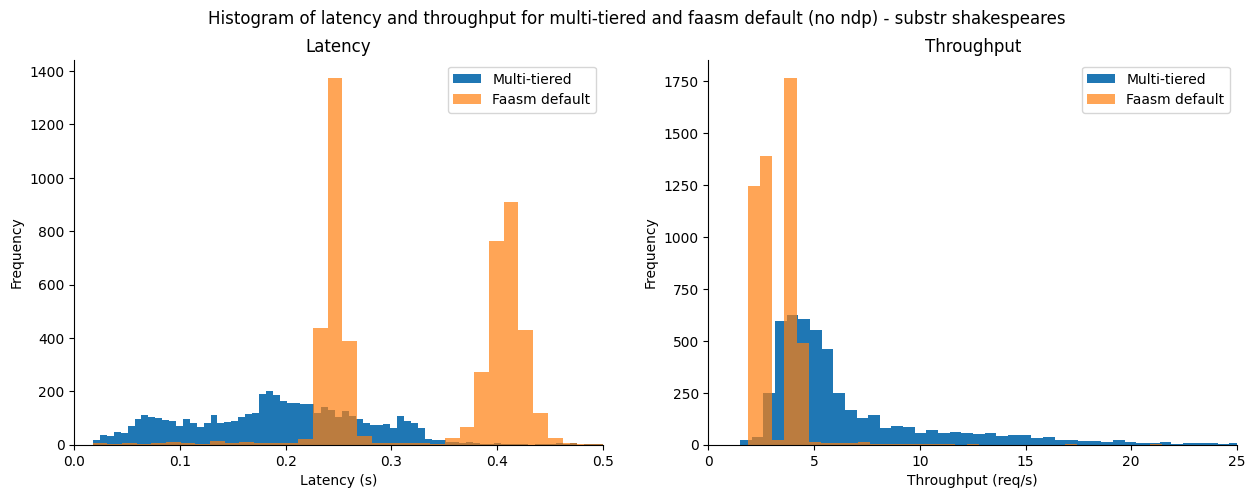

In [15]:
# Plot histogram of Latency
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(multi_tiered_no_ndp['Latency'], bins=100,label='Multi-tiered')
ax[0].hist(faasm_default_no_ndp['Latency'], bins=100, alpha=0.7, label='Faasm default')
ax[0].set_title('Latency')
ax[0].set_xlabel('Latency (s)')
ax[0].set_ylabel('Frequency')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_xlim(0, 0.5)
ax[0].legend()

# Plot histogram of Throughput
ax[1].hist(multi_tiered_no_ndp['Throughput'], bins=100, label='Multi-tiered')
ax[1].hist(faasm_default_no_ndp['Throughput'], bins=100,  alpha=0.7,label='Faasm default')
ax[1].set_title('Throughput')
ax[1].set_xlabel('Throughput (req/s)')
ax[1].set_ylabel('Frequency')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_xlim(0, 25)
ax[1].legend()

fig.suptitle('Histogram of latency and throughput for multi-tiered and faasm default (no ndp) - substr shakespeares')

plt.show()


In [16]:
# Print modes
print("Multi-tiered mode: ",multi_tiered_no_ndp['Latency'].mode())
print("Faasm-default mode: ",faasm_default_no_ndp['Latency'].mode())

Multi-tiered mode:  0    0.183160
1    0.234046
Name: Latency, dtype: float64
Faasm-default mode:  0    0.240278
1    0.241923
2    0.247183
3    0.410074
4    0.421835
Name: Latency, dtype: float64


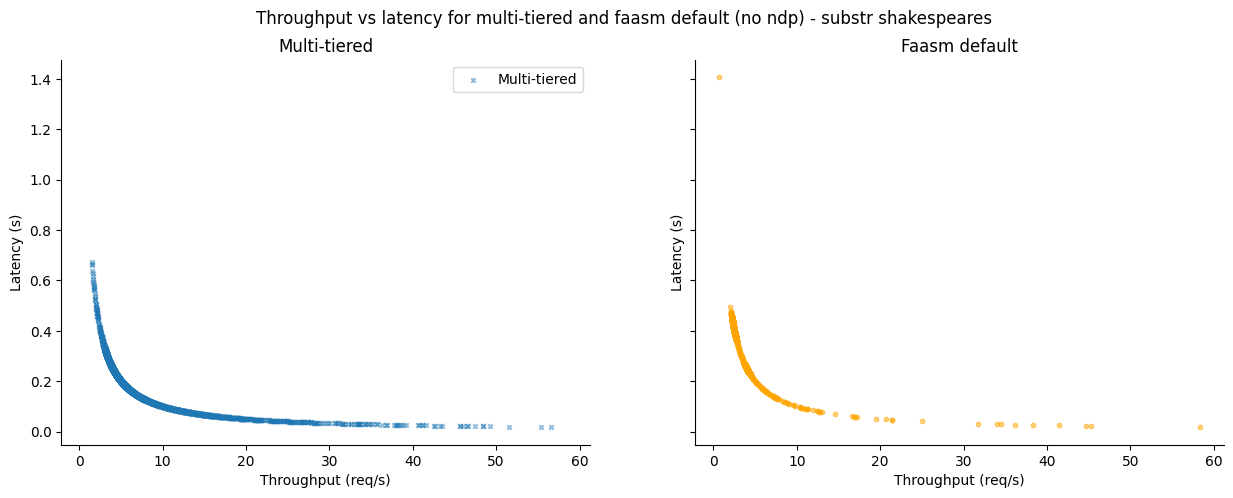

In [17]:
# Plot throughput vs latency
fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True, sharex=True)
ax[0].scatter(multi_tiered_no_ndp['Throughput'], multi_tiered_no_ndp['Latency'], label='Multi-tiered', alpha=0.5, marker='x', s=10)
ax[0].set_title('Multi-tiered')
ax[0].set_xlabel('Throughput (req/s)')
ax[0].set_ylabel('Latency (s)')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend()

ax[1].scatter(faasm_default_no_ndp['Throughput'], faasm_default_no_ndp['Latency'], label='Faasm default', alpha=0.5, marker='o', color='orange', s=10)
ax[1].set_title('Faasm default')
ax[1].set_xlabel('Throughput (req/s)')
ax[1].set_ylabel('Latency (s)')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

fig.suptitle('Throughput vs latency for multi-tiered and faasm default (no ndp) - substr shakespeares')
plt.show()




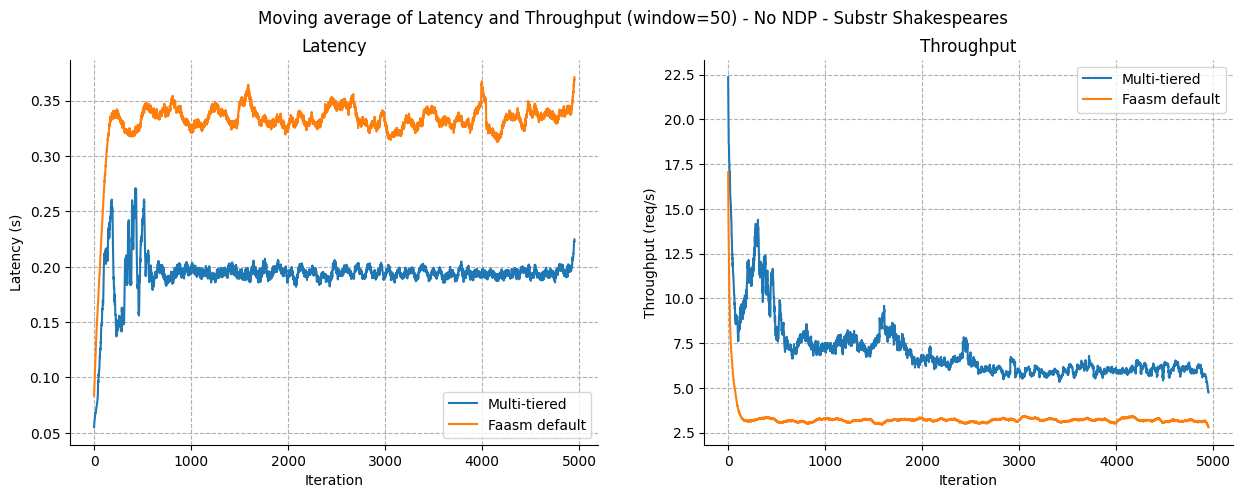

In [48]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

window_size = 50
# Plot moving average of Latency
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(moving_average(multi_tiered_no_ndp['Latency'], window_size), label='Multi-tiered')
ax[0].plot(moving_average(faasm_default_no_ndp['Latency'], window_size), label='Faasm default')
ax[0].set_title('Latency')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('Latency (s)')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(True, linestyle='--')
ax[0].legend()

# Plot moving average of Throughput
ax[1].plot(moving_average(multi_tiered_no_ndp['Throughput'], window_size), label='Multi-tiered')
ax[1].plot(moving_average(faasm_default_no_ndp['Throughput'], window_size), label='Faasm default')
ax[1].set_title('Throughput')
ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('Throughput (req/s)')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(True, linestyle='--')
ax[1].legend()

plt.show()

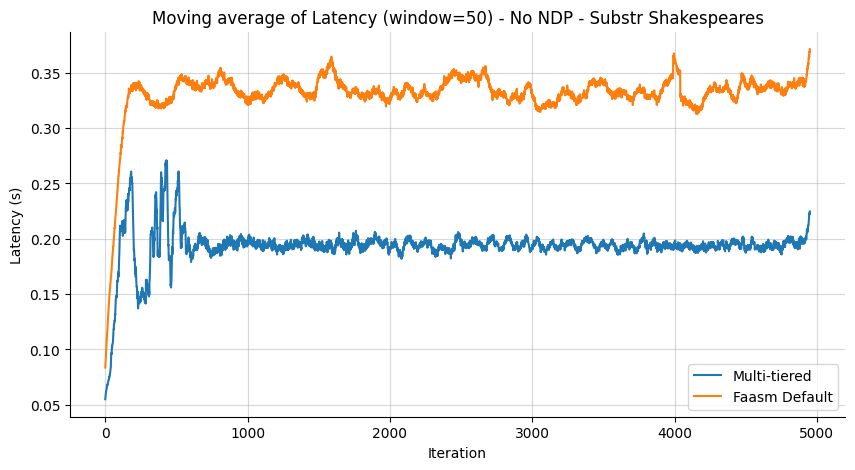

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

window_size = 50
ax.plot(moving_average(multi_tiered_no_ndp['Latency'], window_size), label='Multi-tiered')
ax.plot(moving_average(faasm_default_no_ndp['Latency'], window_size), label='Faasm Default')
ax.set_title('Moving average of Latency (window=50) - No NDP - Substr Shakespeares')
ax.set_xlabel('Iteration')
ax.set_ylabel('Latency (s)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.5)
ax.legend()
plt.show()


In [20]:
# Calculate mean and std dev of latency and throughput
multi_tiered_no_ndp_mean_latency = multi_tiered_no_ndp['Latency'].mean()
multi_tiered_no_ndp_std_latency = multi_tiered_no_ndp['Latency'].std()

faasm_default_no_ndp_mean_latency = faasm_default_no_ndp['Latency'].mean()
faasm_default_no_ndp_std_latency = faasm_default_no_ndp['Latency'].std()

print("Multi-tiered no ndp mean latency: ", multi_tiered_no_ndp_mean_latency)
print("Multi-tiered no ndp std dev latency: ", multi_tiered_no_ndp_std_latency)
print("Faasm default no ndp mean latency: ", faasm_default_no_ndp_mean_latency)
print("Faasm default no ndp std dev latency: ", faasm_default_no_ndp_std_latency)

# Calculate variance
multi_tiered_no_ndp_latency_variance = multi_tiered_no_ndp['Latency'].var()
faasm_default_no_ndp_latency_variance = faasm_default_no_ndp['Latency'].var()

print("Multi-tiered no ndp latency variance: ", multi_tiered_no_ndp_latency_variance)
print("Faasm default no ndp latency variance: ", faasm_default_no_ndp_latency_variance)


Multi-tiered no ndp mean latency:  0.1929318254
Multi-tiered no ndp std dev latency:  0.08715373593557318
Faasm default no ndp mean latency:  0.32998338439999997
Faasm default no ndp std dev latency:  0.0877715227516275
Multi-tiered no ndp latency variance:  0.00759577368752762
Faasm default no ndp latency variance:  0.007703840206139465


# NDP Analysis


In [21]:
multi_tiered_ndp = pd.read_csv('../Data/Dissertation Data/ndp - rr vs default (substr shakespeare)/substr_shakespeare_ndp_rr_500_iters.csv')
faasm_default_ndp = pd.read_csv('../Data/Dissertation Data/ndp - rr vs default (substr shakespeare)/substr_shakespeare_ndp_default_500_iters.csv')

# drop any latency values that are >= 30secs
multi_tiered_ndp = multi_tiered_ndp[multi_tiered_ndp['Latency'] < 20]
faasm_default_ndp = faasm_default_ndp[faasm_default_ndp['Latency'] < 20]

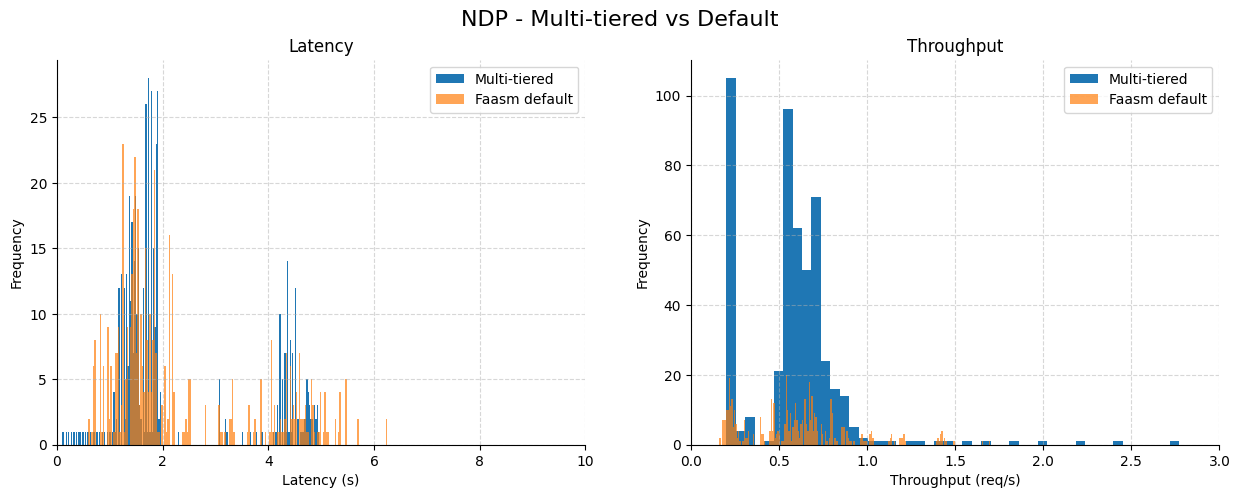

In [22]:
# Plot histogram of Latency
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(multi_tiered_ndp['Latency'], bins=200,label='Multi-tiered')
ax[0].hist(faasm_default_ndp['Latency'], bins=200, alpha=0.7, label='Faasm default')
ax[0].set_title('Latency')
ax[0].set_xlabel('Latency (s)')
ax[0].set_ylabel('Frequency')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(True, linestyle='--', alpha=0.5)
ax[0].set_xlim(0,10)
ax[0].legend()

# Plot histogram of Throughput
ax[1].hist(multi_tiered_ndp['Throughput'], bins=200, label='Multi-tiered')
ax[1].hist(faasm_default_ndp['Throughput'], bins=200,  alpha=0.7,label='Faasm default')
ax[1].set_title('Throughput')
ax[1].set_xlabel('Throughput (req/s)')
ax[1].set_ylabel('Frequency')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(True, linestyle='--', alpha=0.5)
ax[1].set_xlim(0,3)
ax[1].legend()

fig.suptitle('NDP - Multi-tiered vs Default', fontsize=16)

plt.show()


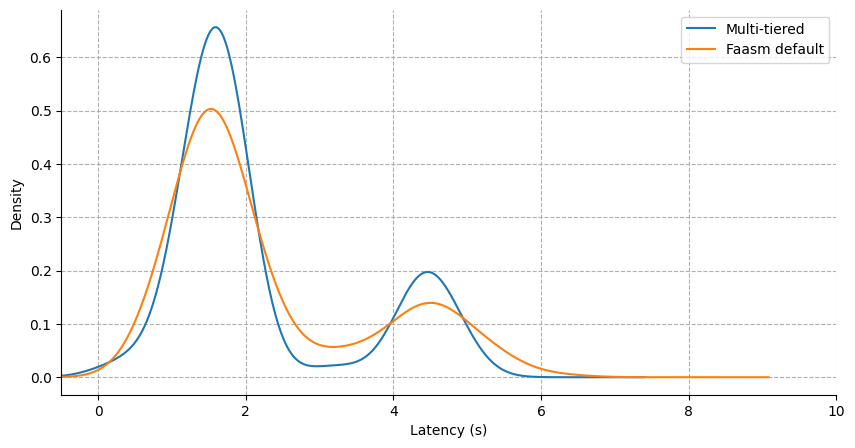

In [46]:
# plot kde of latency from 0 to 10
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
multi_tiered_ndp['Latency'].plot.kde(label='Multi-tiered', ax=ax)
faasm_default_ndp['Latency'].plot.kde(label='Faasm default', ax=ax)
ax.set_xlabel('Latency (s)')
ax.set_ylabel('Density')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# set x-axis limit
ax.set_xlim(-0.5, 10)
ax.legend()
ax.grid(True, linestyle='--')
plt.show()


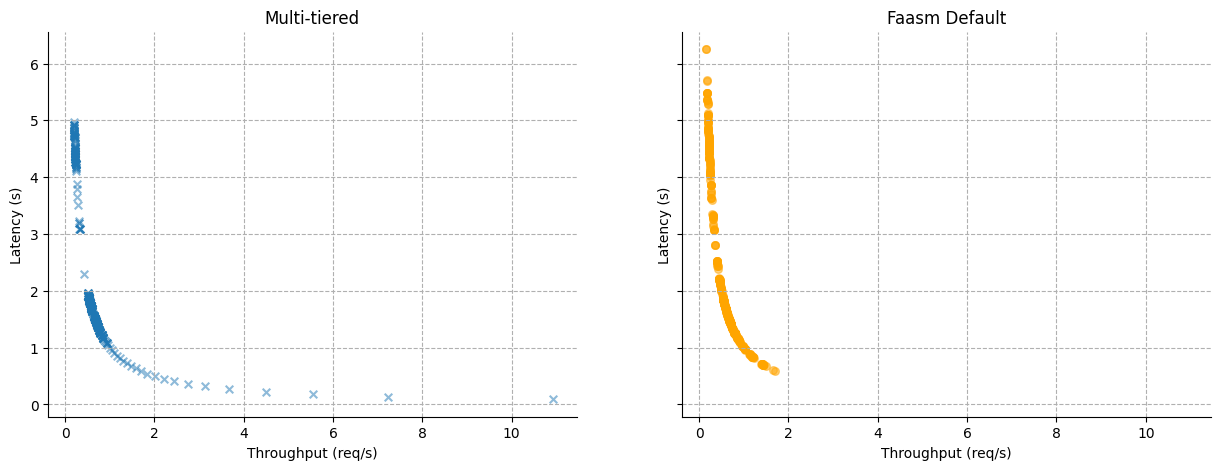

Multi-tiered max throughput:  10.913218089750304
Faasm default max throughput:  1.6975680639915258
Multi-tiered min throughput:  0.2015123501881621
Faasm default min throughput:  0.1599624280249055


In [29]:
# Plot throughput vs latency
fig, ax = plt.subplots(1,2, figsize=(15, 5), sharey=True, sharex=True)
ax[0].scatter(multi_tiered_ndp['Throughput'], multi_tiered_ndp['Latency'], label='Multi-tiered', alpha=0.5, marker='x', s=30)
ax[0].set_title('Multi-tiered')
ax[0].set_xlabel('Throughput (req/s)')
ax[0].set_ylabel('Latency (s)')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].grid(True, linestyle='--')

ax[1].scatter(faasm_default_ndp['Throughput'], faasm_default_ndp['Latency'], label='Faasm default', alpha=0.5, marker='o', color='orange', s=30)
ax[1].set_title('Faasm Default')
ax[1].set_xlabel('Throughput (req/s)')
ax[1].set_ylabel('Latency (s)')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].grid(True, linestyle='--')

plt.show()

# print max throughput
print("Multi-tiered max throughput: ", multi_tiered_ndp['Throughput'].max())
print("Faasm default max throughput: ", faasm_default_ndp['Throughput'].max())
print("Multi-tiered min throughput: ", multi_tiered_ndp['Throughput'].min())
print("Faasm default min throughput: ", faasm_default_ndp['Throughput'].min())



In [ ]:
# plot moving average of latency and throughput
window_size = 50
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(moving_average(multi_tiered_ndp['Latency'], window_size), label='Multi-tiered')
ax[0].plot(moving_average(faasm_default_ndp['Latency'], window_size), label='Faasm default')
ax[0].set_title('Latency')
ax[0].set_xlabel('Iteration')


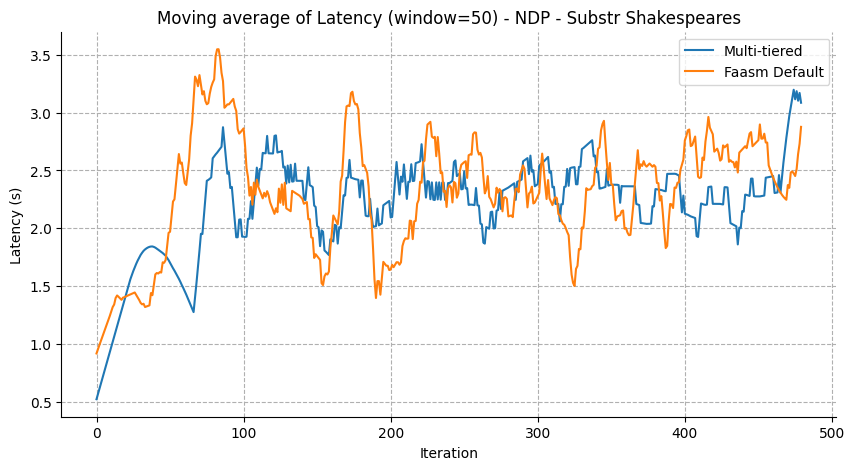

In [47]:
fig = plt.figure(figsize=(10, 5))
window_size=20
plt.plot(moving_average(multi_tiered_ndp['Latency'], window_size), label='Multi-tiered')
plt.plot(moving_average(faasm_default_ndp['Latency'], window_size), label='Faasm Default')
plt.title('Moving average of Latency (window=50) - NDP - Substr Shakespeares')
plt.xlabel('Iteration')
plt.ylabel('Latency (s)')
# remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, linestyle='--')
plt.legend()


In [ ]:
# Statistical analysis
multi_tiered_ndp_mean_latency = multi_tiered_ndp['Latency'].median()
multi_tiered_ndp_std_latency = multi_tiered_ndp['Latency'].std()

faasm_default_ndp_mean_latency = faasm_default_ndp['Latency'].median()
faasm_default_ndp_std_latency = faasm_default_ndp['Latency'].std()

print("Multi-tiered ndp mean latency: ", multi_tiered_ndp_mean_latency)
print("Multi-tiered ndp std dev latency: ", multi_tiered_ndp_std_latency)

print("Faasm default ndp mean latency: ", faasm_default_ndp_mean_latency)
print("Faasm default ndp std dev latency: ", faasm_default_ndp_std_latency)

multi_tiered_ndp_latency_variance = multi_tiered_ndp['Latency'].var()
faasm_default_ndp_latency_variance = faasm_default_ndp['Latency'].var()

print("Multi-tiered ndp latency variance: ", multi_tiered_ndp_latency_variance)
print("Faasm default ndp latency variance: ", faasm_default_ndp_latency_variance)


Multi-tiered ndp mean latency:  1.730688
Multi-tiered ndp std dev latency:  1.2589034615293044
Faasm default ndp mean latency:  1.718519
Faasm default ndp std dev latency:  1.363668650598203
Multi-tiered ndp latency variance:  1.584837925450465
Faasm default ndp latency variance:  1.859592188624324


In [ ]:
# Statistical analysis of throughput
multi_tiered_ndp_mean_throughput = multi_tiered_ndp['Throughput'].mean()
multi_tiered_ndp_std_throughput = multi_tiered_ndp['Throughput'].std()

faasm_default_ndp_mean_throughput = faasm_default_ndp['Throughput'].mean()
faasm_default_ndp_std_throughput = faasm_default_ndp['Throughput'].std()

print("Multi-tiered ndp mean throughput: ", multi_tiered_ndp_mean_throughput)
print("Multi-tiered ndp std dev throughput: ", multi_tiered_ndp_std_throughput)

print("Faasm default ndp mean throughput: ", faasm_default_ndp_mean_throughput)
print("Faasm default ndp std dev throughput: ", faasm_default_ndp_std_throughput)

multi_tiered_ndp_throughput_variance = multi_tiered_ndp['Throughput'].var()
faasm_default_ndp_throughput_variance = faasm_default_ndp['Throughput'].var()

print("Multi-tiered ndp throughput variance: ", multi_tiered_ndp_throughput_variance)
print("Faasm default ndp throughput variance: ", faasm_default_ndp_throughput_variance)

multi_tiered_ndp_median_throughput = multi_tiered_ndp['Throughput'].median()
faasm_default_ndp_median_throughput = faasm_default_ndp['Throughput'].median()

print("Multi-tiered ndp median throughput: ", multi_tiered_ndp_median_throughput)
print("Faasm default ndp median throughput: ", faasm_default_ndp_median_throughput)

Multi-tiered ndp mean throughput:  0.6404579100461416
Multi-tiered ndp std dev throughput:  0.7014833402105182
Faasm default ndp mean throughput:  0.5846940036365593
Faasm default ndp std dev throughput:  0.2979407232974781
Multi-tiered ndp throughput variance:  0.49207887659290556
Faasm default ndp throughput variance:  0.08876867459902442
Multi-tiered ndp median throughput:  0.5778048960875675
Faasm default ndp median throughput:  0.5818963886928221
